In [2]:
import pandas as pd
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names = ['SepalLengthCm','SepalWidthCm','PetalLenthCm','PetalWidthCm','Species'])

In [31]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLenthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLenthCm,PetalWidthCm,Species
20,5.4,3.4,1.7,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
41,4.5,2.3,1.3,0.3,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa


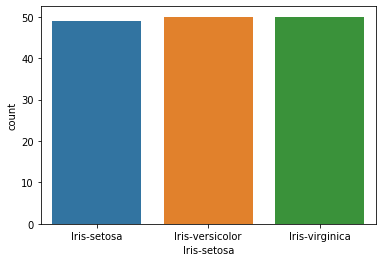

In [16]:
import seaborn
%matplotlib inline
seaborn.countplot('Iris-setosa',data=iris)

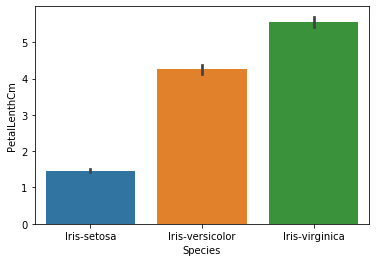

In [34]:
seaborn.barplot(x='Species',y='PetalLenthCm',data=iris)

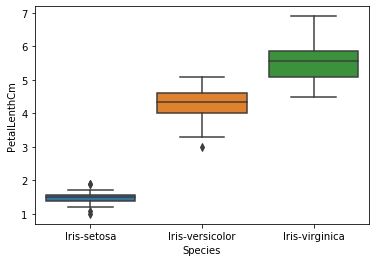

In [35]:
seaborn.boxplot(x='Species',y='PetalLenthCm',data=iris)


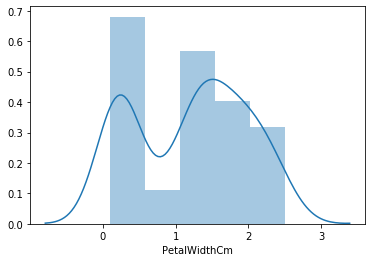

In [37]:
seaborn.distplot(iris['PetalWidthCm'])

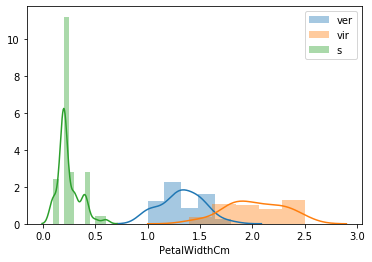

In [46]:
iris_ver = iris[iris.Species=="Iris-versicolor"]
iris_vir = iris[iris.Species=="Iris-virginica"]
iris_s = iris[iris.Species=="Iris-setosa"]
seaborn.distplot(iris_ver['PetalWidthCm'],label='ver')
seaborn.distplot(iris_vir['PetalWidthCm'],label='vir')
seaborn.distplot(iris_s['PetalWidthCm'],label='s').legend()

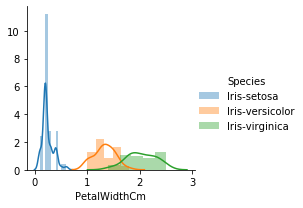

In [53]:
g=seaborn.FacetGrid(iris,hue='Species')
g.map(seaborn.distplot,'PetalWidthCm').add_legend()

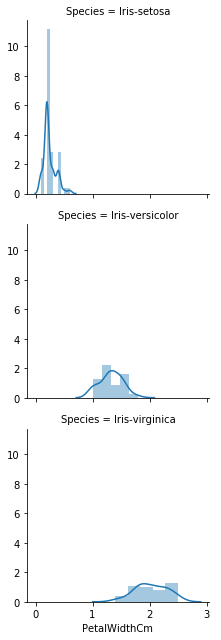

In [54]:
g=seaborn.FacetGrid(iris,row='Species')
g.map(seaborn.distplot,'PetalWidthCm').add_legend()

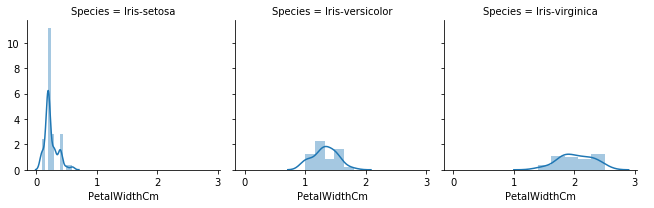

In [58]:
g=seaborn.FacetGrid(iris,col='Species')
g.map(seaborn.distplot,'PetalWidthCm').add_legend()

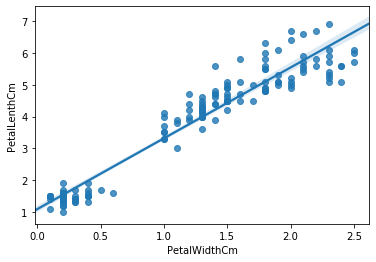

In [61]:
seaborn.regplot(x='PetalWidthCm',y='PetalLenthCm',data=iris)

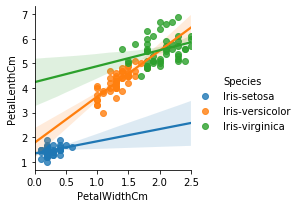

In [67]:
g=seaborn.FacetGrid(iris,hue='Species')
g.set(xlim=(0,2.5))
g.map(seaborn.regplot,'PetalWidthCm','PetalLenthCm').add_legend()

In [6]:
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLenthCm,PetalWidthCm,Species
97,6.2,2.9,4.3,1.3,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor


In [25]:
import statsmodels.stats.weightstats
statsmodels.stats.weightstats.ztest(iris['SepalLengthCm'],value=5.6)

(3.5990030502320947, 0.0003194394431375392)

In [26]:
import scipy.stats
scipy.stats.ttest_1samp(iris['SepalLengthCm'],popmean=5.6)

Ttest_1sampResult(statistic=3.5990030502320947, pvalue=0.00043415775204472924)

In [39]:
iris1 = iris[iris.Species=='Iris-versicolor']
iris2 = iris[iris.Species == 'Iris-setosa']
scipy.stats.ttest_ind(iris1['SepalLengthCm'],iris2['SepalLengthCm'])

Ttest_indResult(statistic=10.52098626754911, pvalue=8.985235037487077e-18)

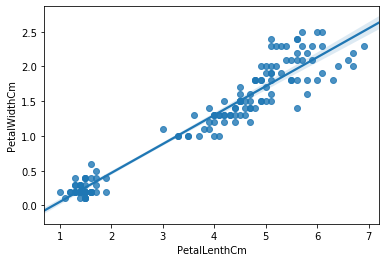

In [4]:
import seaborn
%matplotlib inline
seaborn.regplot(x='PetalLenthCm',y='PetalWidthCm',data=iris)

In [15]:
#1维线性回归
from sklearn import linear_model
lm=linear_model.LinearRegression()
features=['PetalLenthCm']
X=iris[features]
y=iris['PetalWidthCm']
print(X.shape,y.shape)
model=lm.fit(X,y)
print(model.intercept_,model.coef_)

(150, 1) (150,)
-0.3665140452167275 [0.41641913]


In [18]:
model.predict([[4]])

array([1.29916248])

In [19]:
#2维线性回归
features=['PetalLenthCm','SepalLengthCm']
X=iris[features]
y=iris['PetalWidthCm']
print(X.shape,y.shape)
model=lm.fit(X,y)
print(model.intercept_,model.coef_)

(150, 2) (150,)
-0.013852011013003596 [ 0.44992999 -0.08190841]


In [6]:
#交叉检验
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
lm=linear_model.LinearRegression()
features=['PetalLenthCm']
X=iris[features]
y=iris['PetalWidthCm']
score=-cross_val_score(lm,X,y,cv=5,scoring='neg_mean_squared_error')
print(np.mean(score))


0.04548097902618274


In [27]:
features=['PetalLenthCm','SepalLengthCm']
X=iris[features]
y=iris['PetalWidthCm']
score=-cross_val_score(lm,X,y,cv=5,scoring='neg_mean_squared_error')
print(np.mean(score))

0.046018952575842785


In [19]:
#分类问题-逻辑回归
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris['Species'])
lm=linear_model.LogisticRegression()
features=['PetalLenthCm','PetalLenthCm','PetalWidthCm']
X=iris[features]
y=le.transform(iris['Species'])
scores=cross_val_score(lm,X,y,cv=5,scoring='accuracy')
print(np.mean(scores))

0.8733333333333334
